In [1]:
import pandas as pd
df=pd.read_csv('dataset.csv',usecols=['Category','Message'],header=0)


text=df['Message']
tags=df['Category']

print(df.head())
print(df.shape)
print(df.describe())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
(5572, 2)
       Category                 Message
count      5572                    5571
unique        2                    5150
top         ham  Sorry, I'll call later
freq       4825                      30


In [2]:
#using sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

train_x,test_x,train_y,test_y=train_test_split(text,tags,random_state=1)
print(train_x.shape)
print(test_x.shape)

encoder=LabelEncoder()
train_y=encoder.fit_transform(train_y)
test_y=encoder.fit_transform(test_y)
print(train_x.dtype)

(4179,)
(1393,)
object


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


In [10]:
vect=CountVectorizer(stop_words='english')
xtrain_count=vect.fit_transform(train_x.values.astype('U'))


In [11]:
tfidf=TfidfTransformer()
xtrain_tfidf=tfidf.fit_transform(xtrain_count)

In [12]:
nb=MultinomialNB()
nb_model=nb.fit(xtrain_tfidf,train_y)

In [13]:
#testing the model
import numpy as np

xtest_count=vect.transform(test_x)
xtest_tfidf=tfidf.transform(xtest_count)

predicted=nb_model.predict(xtest_tfidf)
print(np.mean(predicted==test_y))

0.9734386216798278


In [40]:
#svm model

from sklearn.linear_model import SGDClassifier
svmc=SGDClassifier(random_state=1,alpha=.0001)

svm_model=svmc.fit(xtrain_tfidf,train_y)

predicted=svm_model.predict(xtest_tfidf)
print(np.mean(predicted==test_y))

0.9913854989231874


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import metrics

Using TensorFlow backend.


In [27]:
input_size=7108
def neural_model():
    m=Sequential()
    m.add(Dense(512,activation='relu',input_shape=(input_size,))) 
    m.add(Dropout(0.3))
    m.add(Dense(216,activation='relu')) #hidden layer-1
    m.add(Dropout(0.3))
    m.add(Dense(1,activation='sigmoid')) #output layer
    m.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return m

In [28]:
model=neural_model()
from keras import callbacks
es_callback = callbacks.EarlyStopping(monitor='val_loss', patience=3)

hist=model.fit(xtrain_tfidf,train_y,batch_size=500,epochs=10,verbose=1,validation_split=0.1,callbacks=[es_callback])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 3761 samples, validate on 418 samples
Epoch 1/10
3761/3761 [==============================] - 5s 1ms/step - loss: 0.6185 - acc: 0.8399 - val_loss: 0.4908 - val_acc: 0.8708
Epoch 2/10
3761/3761 [==============================] - 3s 750us/step - loss: 0.3824 - acc: 0.8649 - val_loss: 0.2591 - val_acc: 0.8708
Epoch 3/10
3761/3761 [==============================] - 3s 709us/step - loss: 0.2107 - acc: 0.8649 - val_loss: 0.1980 - val_acc: 0.8708
Epoch 4/10
3761/3761 [==============================] - 3s 703us/step - loss: 0.1564 - acc: 0.8649 - val_loss: 0.1715 - val_acc: 0.8708
Epoch 5/10
3761/3761 [==============================] - 3s 710us/step - loss: 0.1231 - acc: 0.8881 - val_loss: 0.1532 - val_acc: 0.9498
Epoch 6/10
3761/3761 [==================

In [30]:
model.evaluate(xtest_tfidf,test_y)

1393/1393 [==============================] - 1s 439us/step


[0.04066878163014396, 0.9935391241923905]

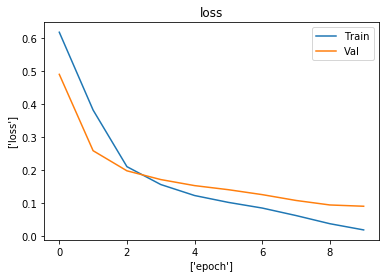

In [32]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.xlabel(['epoch'])
plt.ylabel(['loss'])
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

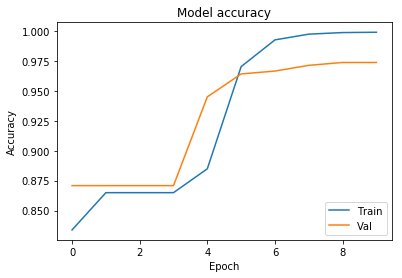

In [35]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

